**Multi Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
import warnings as wr
wr.filterwarnings('ignore')

**Load the dataset**

In [ ]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


*1. Perform EDA*

**Summary Statistic**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,1436.0,NaN,NaN,NaN,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.0,32500.0
Age_08_04,1436.0,NaN,NaN,NaN,55.947075,18.599988,1.0,44.0,61.0,70.0,80.0
KM,1436.0,NaN,NaN,NaN,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
Fuel_Type,1436,3,Petrol,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,1436.0,NaN,NaN,NaN,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
Automatic,1436.0,NaN,NaN,NaN,0.05571,0.229441,0.0,0.0,0.0,0.0,1.0
cc,1436.0,NaN,NaN,NaN,1576.85585,424.38677,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1436.0,NaN,NaN,NaN,4.033426,0.952677,2.0,3.0,4.0,5.0,5.0
Cylinders,1436.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0
Gears,1436.0,NaN,NaN,NaN,5.026462,0.18851,3.0,5.0,5.0,5.0,6.0


**Visualization**

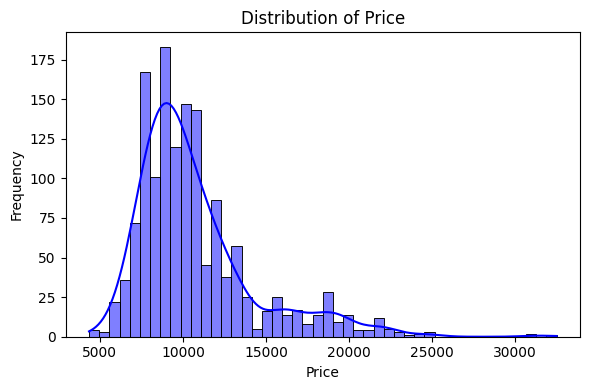

In [ ]:
#Distribution of target variable (price)
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

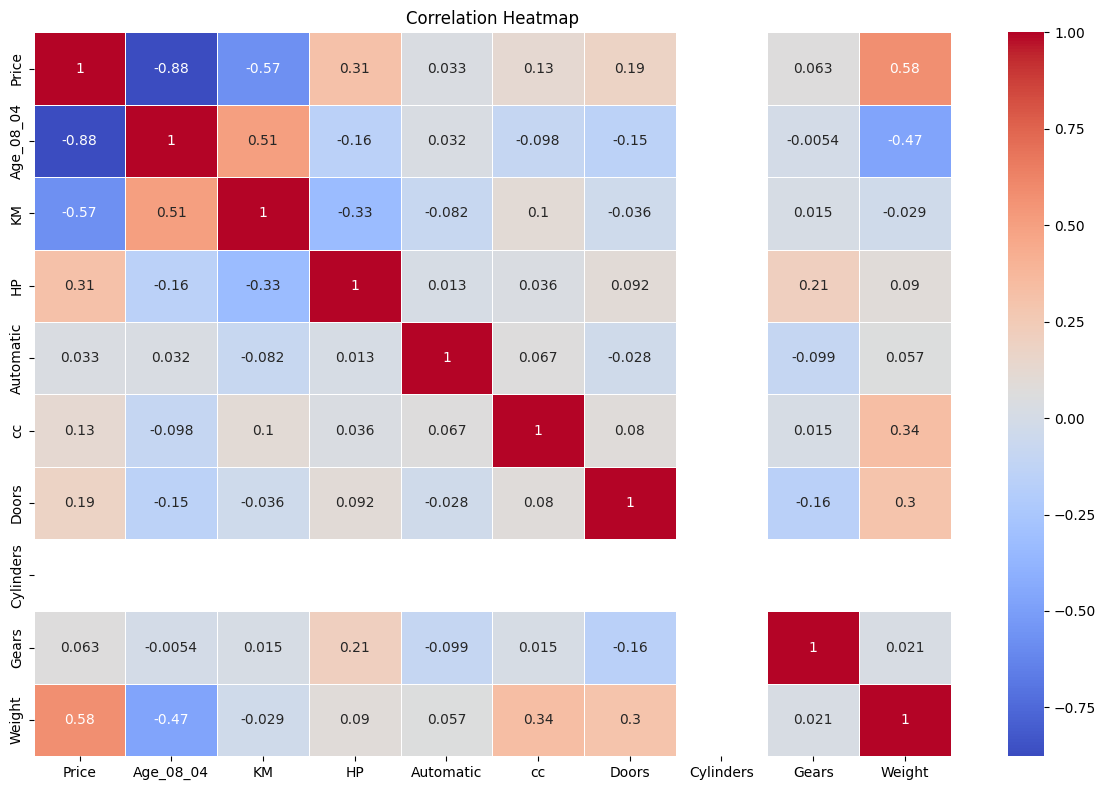

In [ ]:
#Correlation Heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

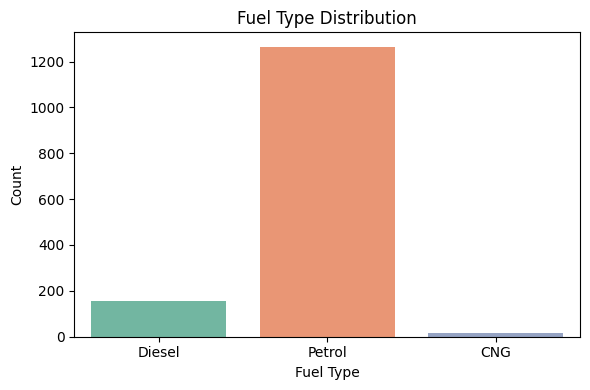

In [ ]:
#Bar plot for the categorical variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fuel_Type', palette='Set2')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Preprocessing for MLR**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

*2. Split the dataset (80% Train, 20% Test)*

In [ ]:
x=df_encoded.drop(columns=['Price'])
y=df_encoded['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)

Training set size: (1148, 11)
Testing set size: (288, 11)


*3. Build 3 Different models*

In [ ]:
#Model 1 : Full Feature Model
model1 = LinearRegression()
model1.fit(x_train, y_train)
coeff_model1=pd.Series(model1.coef_, index= x_train.columns)
print(coeff_model1)

Age_08_04          -1.208305e+02
KM                 -1.623141e-02
HP                  1.403948e+01
Automatic           1.488309e+02
cc                 -3.037219e-02
Doors              -6.031097e+01
Cylinders          -1.620037e-12
Gears               5.516007e+02
Weight              2.588496e+01
Fuel_Type_Diesel   -6.854876e+01
Fuel_Type_Petrol    1.370809e+03
dtype: float64


In [ ]:
#Model2 : Simplified Model (Only important Numerical Feature)
selected_features=['Age_08_04', 'KM', 'HP', 'Weight']
x_train_model2 = x_train[selected_features]
x_test_model2 = x_test[selected_features]
model2 = LinearRegression()
model2.fit(x_train_model2, y_train)
coeff_model2=pd.Series(model2.coef_, index= x_train_model2.columns)
print(coeff_model2)

Age_08_04   -120.025405
KM            -0.020233
HP            29.052170
Weight        19.769066
dtype: float64


In [ ]:
#Model3 : Selected feature of + Categorical variables
selected_features2=['Age_08_04', 'KM', 'HP', 'Weight', 'Automatic' , 'Fuel_Type_Petrol', 'Fuel_Type_Diesel']
x_train_model3 = x_train[selected_features2]
x_test_model3 = x_test[selected_features2]
model3 = LinearRegression()
model3.fit(x_train_model3, y_train)
coeff_model3=pd.Series(model3.coef_, index= x_train_model3.columns)
print(coeff_model3)

Age_08_04           -120.968986
KM                    -0.016177
HP                    16.700809
Weight                25.021093
Automatic            120.237154
Fuel_Type_Petrol    1416.404495
Fuel_Type_Diesel      88.139531
dtype: float64


*4. Performance of Evaluation*

In [ ]:
y_pred_model1 = model1.predict(x_test)
y_pred_model2 = model2.predict(x_test_model2)
y_pred_model3 = model3.predict(x_test_model3)

In [ ]:
mse1 = mean_squared_error(y_test, y_pred_model1)
mse2 = mean_squared_error(y_test, y_pred_model2)
mse3 = mean_squared_error(y_test, y_pred_model3)

In [ ]:
mae1 = mean_absolute_error(y_test, y_pred_model1)
mae2 = mean_absolute_error(y_test, y_pred_model2)
mae3 = mean_absolute_error(y_test, y_pred_model3)

In [ ]:
r2_1 = r2_score(y_test, y_pred_model1)
r2_2 = r2_score(y_test, y_pred_model2)
r2_3 = r2_score(y_test, y_pred_model3)

In [ ]:
evaluation_df = pd.DataFrame({
    'Model': ['Full Feature Model', 'Simplified Model', 'Selected Feature Model + Categorical'],
    'Mean Squared Error': [mse1, mse2, mse3],
    'Mean Absolute Error': [mae1, mae2, mae3],
    'R-squared': [r2_1, r2_2, r2_3]
})
evaluation_df.round(2)

,Model,Mean Squared Error,Mean Absolute Error,R-squared
0,Full Feature Model,2203043.82,990.89,0.83
1,Simplified Model,1993321.01,1001.20,0.85
2,Selected Feature Model + Categorical,2204601.20,1000.71,0.83


*5. Apply Lasso and Ridge methods on the model.*

In [ ]:
#Apply in model3
selected_features2=['Age_08_04', 'KM', 'HP', 'Weight', 'Automatic' , 'Fuel_Type_Petrol', 'Fuel_Type_Diesel']
x_train_sel = x_train[selected_features2]
x_test_sel = x_test[selected_features2]

#Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_sel, y_train)
y_pred_lasso = lasso.predict(x_test_sel)

#Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(x_train_sel, y_train)
y_pred_ridge = ridge.predict(x_test_sel)

In [ ]:
print("Lasso Regression:")
print("R-Squared", r2_score(y_test, y_pred_lasso))
print("Mean Squared Error", mean_squared_error(y_test, y_pred_lasso))

print("\nRidge Regression:")
print("R-Squared", r2_score(y_test, y_pred_ridge))
print("Mean Squared Error", mean_squared_error(y_test, y_pred_ridge))

Lasso Regression:
R-Squared 0.8347243594522964
Mean Squared Error 2205237.9728355636

Ridge Regression:
R-Squared 0.8347892697022045
Mean Squared Error 2204371.8890772485


Ridge Regression is performing slightly beytyter than Lasso based on both:

*   Higher R2 (explains more variance)
*   Lower MSE (makes slightly fewer errors)

The difference is **very small**, but Ridge wins here.




**Interview Questions:**
1.  What is Normalization & Standardization and how is it helpful?

**Answer:** Normalization (also called **min-max scaling**) rescales the data to a fixed range, usually [0,1].

Standardization (also called **Z-score normalization**) transforms the data to have a means of 0 and a standard deviation of 1.

Helpful

*  Improves model accuracy.
*   Faster convergence.
*  Avoids dominance.



2. What techniques can be used to address multicollinearity in multiple linear regression?

**Answer:**

*  Remove Highly Correlated Predictors
*  Variance Inflation Factor (VIF)
*  Principal Component Analysis (PCA)
* Regularization Techniques

